In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html 
df = pd.read_csv("AirQualityUCI.csv", delimiter=';')

## Usuwanie niepotrzebnych do zad. kolumn

In [2]:
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

## Usuwanie wierszy w których wszystkie wartości są równe NaN

In [3]:
df = df.dropna(how='all').reset_index(drop=True)
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


## Zamiana wartości kolumn na odpowiedznie typy

In [4]:
df = df.replace(',','.', regex = True)

In [5]:
df = df.astype({'Date': 'datetime64[ns]', 'CO(GT)' :'float32', 'C6H6(GT)': 'float32', 'T': 'float32', 'RH': 'float32', 'AH': 'float32'})

## Grupowanie wg. daty oraz rysowanie wykresu (Pkt.2)

In [6]:
df = df.groupby('Date').mean().reset_index()

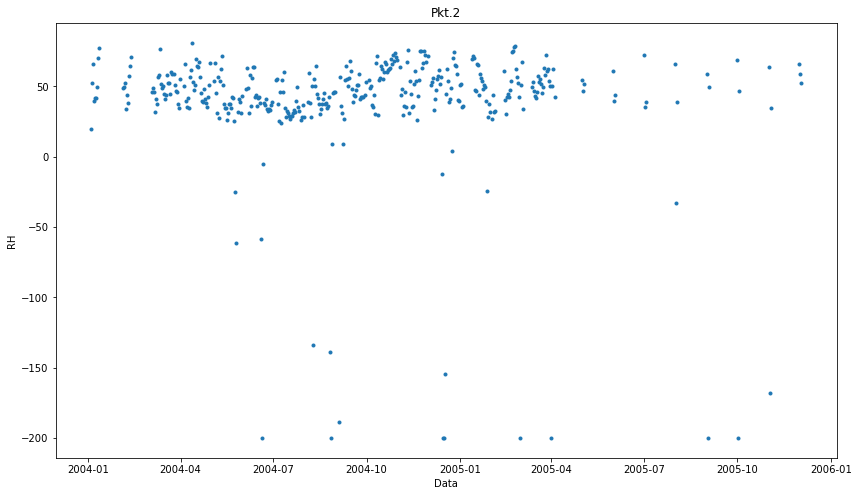

In [7]:
x = df['Date']
y = df['RH']
plt.figure(figsize=(14,8))
plt.plot(x,y, '.')
plt.xlabel('Data')
plt.ylabel('RH')
plt.title("Pkt.2")
plt.show()

## Zamiana wartości pustych kolumny 'RH' i wypełnienie ich medianą (Pkt.3)

In [21]:
liczbaWartosciPustychPrzed = df['RH'].isnull().sum()
mediana = df['RH'].median()
mediana
df['RH'] = df['RH'].replace(np.NaN, mediana)
liczbaWartosciPustychPo = df['RH'].isnull().sum()
print('Liczba wartości pustych przed: ' + str(liczbaWartosciPustychPrzed))
print('Liczba wartości pustych po: ' + str(liczbaWartosciPustychPo))

Liczba wartości pustych przed: 0
Liczba wartości pustych po: 0


## Wykrywanie wartości odstających za pomocą percentyli oraz IQR(przestrzeni międzykwantylowej)

In [9]:
min_Wart_percentyl, max_Wart_percentyl = df.RH.quantile([0.05, 0.95])
min_Wart_percentyl, max_Wart_percentyl

(-0.48958349227905273, 71.6624984741211)

In [10]:
czyOutlier = ~df['RH'].between(min_Wart_percentyl, max_Wart_percentyl)
df['outlier'] = czyOutlier
outliers = df.loc[df['outlier'] == True]
dfPercentyl = df.loc[df['outlier']==True]
dfPercentyl = dfPercentyl[['RH','T']]

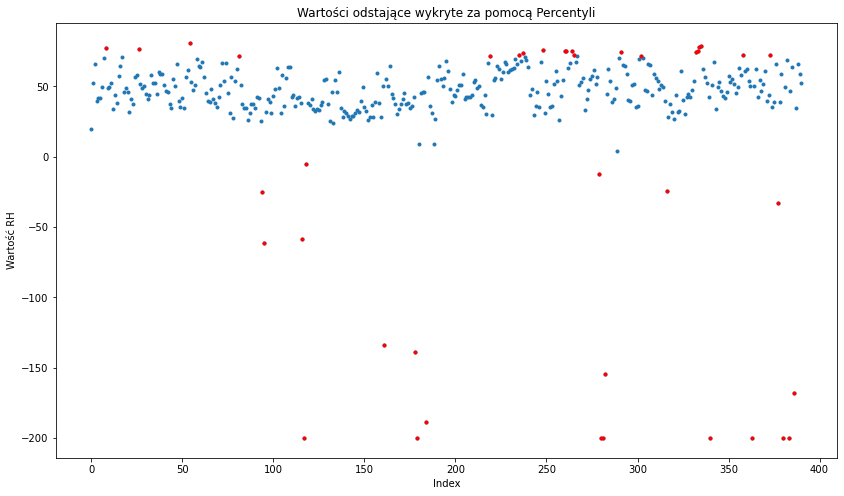

In [11]:
x = df.index
y = df['RH']
xOutlier = outliers.index
yOutlier = outliers['RH']
plt.figure(figsize=(14,8))
plt.plot(x,y, '.')
plt.plot(xOutlier, yOutlier, 'r.')
plt.xlabel('Index')
plt.ylabel('Wartość RH')
plt.title("Wartości odstające wykryte za pomocą Percentyli")
plt.show()

In [12]:
q1, q3 = df.RH.quantile([0.25, 0.75])
q1, q3
IQR = (q3 - q1)*1.5
IQR
min_Wart_kwantyl = q1 - IQR
max_Wart_kwantyl = q3 + IQR
min_Wart_kwantyl, max_Wart_kwantyl

(6.478122711181641, 88.01979446411133)

In [13]:
czyOutlier = ~df['RH'].between(min_Wart_kwantyl, max_Wart_kwantyl)
df['outlier'] = czyOutlier
outliers = df.loc[df['outlier'] == True]
dfIQR = df.loc[df['outlier']==True]
dfIQR = dfIQR[['RH','T']]

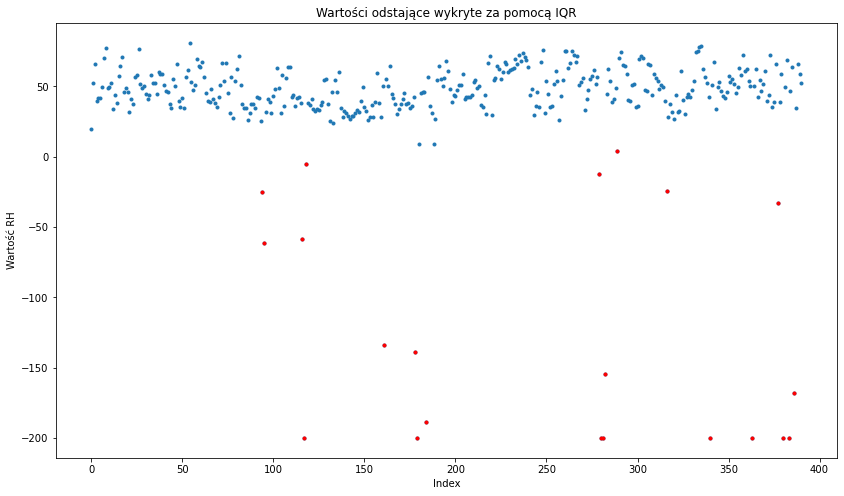

In [14]:
x = df.index
y = df['RH']
xOutlier = outliers.index
yOutlier = outliers['RH']
plt.figure(figsize=(14,8))
plt.plot(x,y, '.')
plt.plot(xOutlier, yOutlier, 'r.')
plt.xlabel('Index')
plt.ylabel('Wartość RH')
plt.title("Wartości odstające wykryte za pomocą IQR")
plt.show()

## Porównanie wartosci Outlier-ów
Metoda IQR wykryła mniej outlier-ów niż metoda percentyli, lecz z wyjątkiem 1 przypadku ograniczyła się tylko do wartości
ujemnych co w przydadku kolumny RH której wartością są procety jest korzystniejsze

In [15]:
dfIQR_styler = dfIQR.sort_values(['RH'], ascending=False).style.set_table_attributes("style='display:inline'").set_caption('Outlier-s na podstawie IQR')
dfPercentyl_styler = dfPercentyl.sort_values(['RH'], ascending=False).style.set_table_attributes("style='display:inline'").set_caption('Outlier-s na podstawie Percentyli')

display_html(dfIQR_styler._repr_html_()+ ' ' +dfPercentyl_styler._repr_html_(), raw=True)

,RH,T
289,4.437500,-36.020832
118,-5.416667,-12.141666
279,-11.941667,-51.354168
316,-24.008333,-55.512501
94,-24.783333,-23.916666
377,-32.745834,-52.125000
116,-58.304165,-68.074997
95,-61.500000,-57.945835
161,-133.683334,-133.729172
178,-138.675003,-144.074997


## Historgram zmiennej T

z histogramu wynika iż przez większość roku temperatura oscyluje w okolicach 10 - 30 stopni
z czego można wywnioskować że mamy do czynienia z krajem o ciepłym/tropikalnym klimacie 

Text(0, 0.5, 'Ilość Dni')

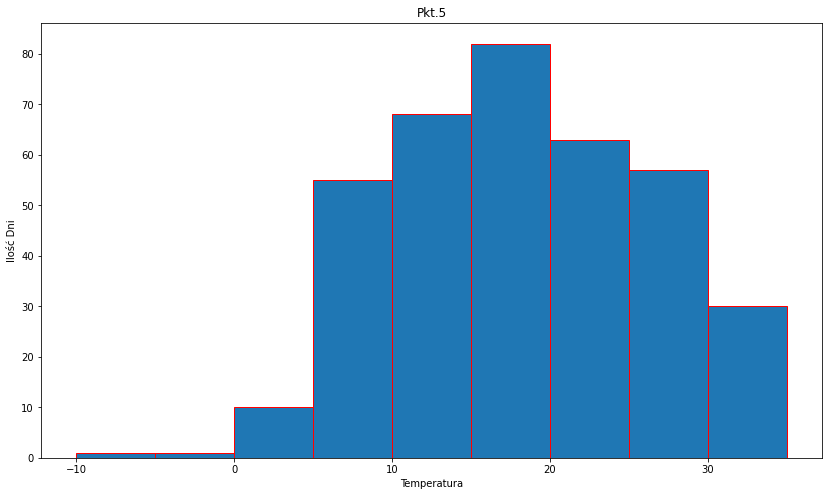

In [16]:
bins = [-10, -5, 0, 5, 10, 15, 20, 25, 30, 35]
plt.figure(figsize=(14,8))
plt.hist(df['T'], bins=bins, edgecolor = 'red')
plt.title('Pkt.5')
plt.xlabel('Temperatura')
plt.ylabel('Ilość Dni')

## Macierz Korelacji

z macierzy wynika iż istnieje silna korelacja między zmiennymi T a RH na poziomie 0.91 co można zobaczyć poniżej na zwizualizowanej macierzy korelacji

Korelacja między RH a T = 0.9142659570187277
Macierz Korelacji:



,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,outlier
CO(GT),1.000000,-0.018511,0.115363,-0.073264,-0.063673,0.652625,-0.056044,0.805937,-0.162609,0.034199,-0.113500,-0.062644,-0.076160,0.059725
PT08.S1(CO),-0.018511,1.000000,0.144224,0.893584,0.931563,0.097459,0.388667,0.019969,0.789866,0.887836,0.827593,0.885107,0.854849,-0.765614
NMHC(GT),0.115363,0.144224,1.000000,0.022742,0.045626,-0.084515,0.181639,0.063170,0.135982,0.040799,-0.005468,0.019562,0.015003,-0.040651
C6H6(GT),-0.073264,0.893584,0.022742,1.000000,0.864649,-0.098139,0.674268,-0.079905,0.777468,0.689756,0.977718,0.960944,0.994262,-0.885028
PT08.S2(NMHC),-0.063673,0.931563,0.045626,0.864649,1.000000,0.085747,0.313722,-0.023703,0.862417,0.905083,0.815682,0.806296,0.807293,-0.710672
NOx(GT),0.652625,0.097459,-0.084515,-0.098139,0.085747,1.000000,-0.361668,0.828633,-0.236918,0.341181,-0.221974,-0.040438,-0.140946,0.121126
PT08.S3(NOx),-0.056044,0.388667,0.181639,0.674268,0.313722,-0.361668,1.000000,-0.159112,0.393151,0.050450,0.698158,0.636781,0.724138,-0.641152
NO2(GT),0.805937,0.019969,0.063170,-0.079905,-0.023703,0.828633,-0.159112,1.000000,-0.205352,0.140068,-0.147910,-0.076794,-0.093724,0.076619
PT08.S4(NO2),-0.162609,0.789866,0.135982,0.777468,0.862417,-0.236918,0.393151,-0.205352,1.000000,0.643803,0.816971,0.709600,0.740413,-0.668528
PT08.S5(O3),0.034199,0.887836,0.040799,0.689756,0.905083,0.341181,0.050450,0.140068,0.643803,1.000000,0.590002,0.667967,0.619357,-0.540608


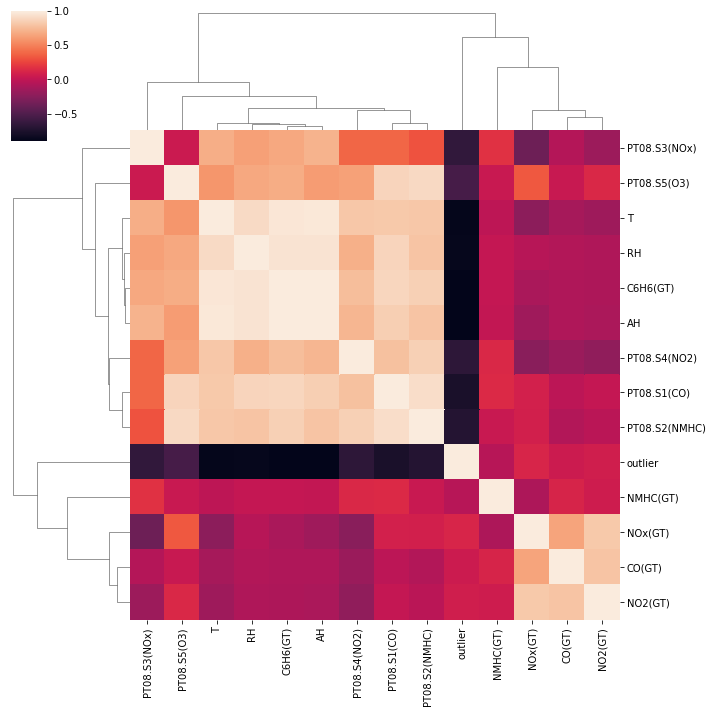

In [29]:
macierzKorelacji = df.corr()
korelacja_RH_T = df['RH'].corr(df['T'])
print('Korelacja między RH a T = ' + str(korelacja_RH_T))
print('Macierz Korelacji:\n')
df.corr()

Macierz Korelacji przedstawiona za pomocą clustermap:



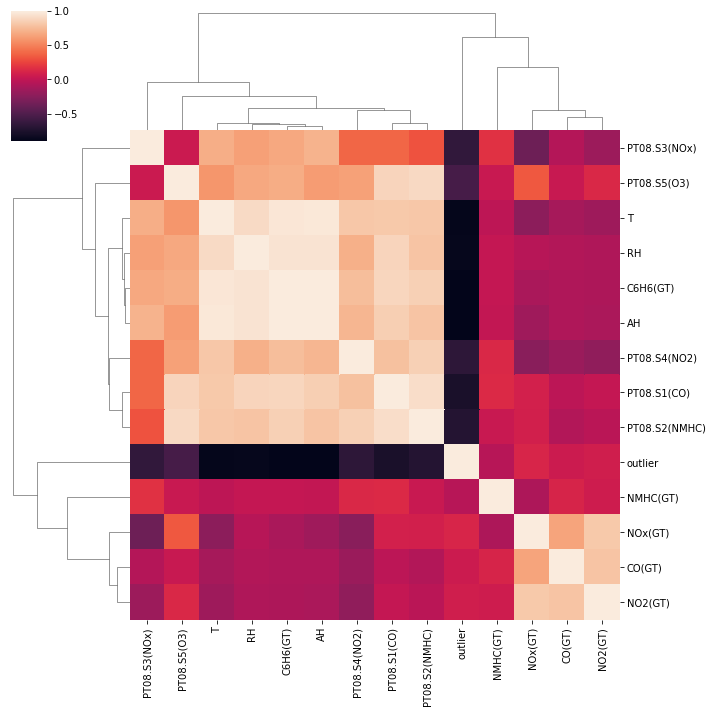

In [30]:
print('Macierz Korelacji przedstawiona za pomocą clustermap:\n')
sns.clustermap(macierzKorelacji)